In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import scvelo as scv
import cellrank as cr

In [4]:
from cellrank import kernels as crpk
from cellrank.estimators import GPCCA

In [2]:
cr.settings.verbosity = 2

# Using CellRank to compute driver genes and cell fate probabilities

In [3]:
adata_pan_dyn = sc.read_h5ad('/home/sarah.ancheta/bruno/projects/theory_ds/internship/abel.gurung/new_adata/new_adata_pancreas_scVelo_dynamical_Jul11.h5ad')

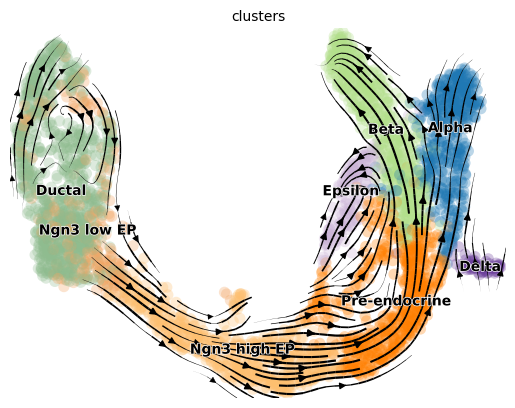

In [6]:
scv.pl.velocity_embedding_stream(adata_pan_dyn)

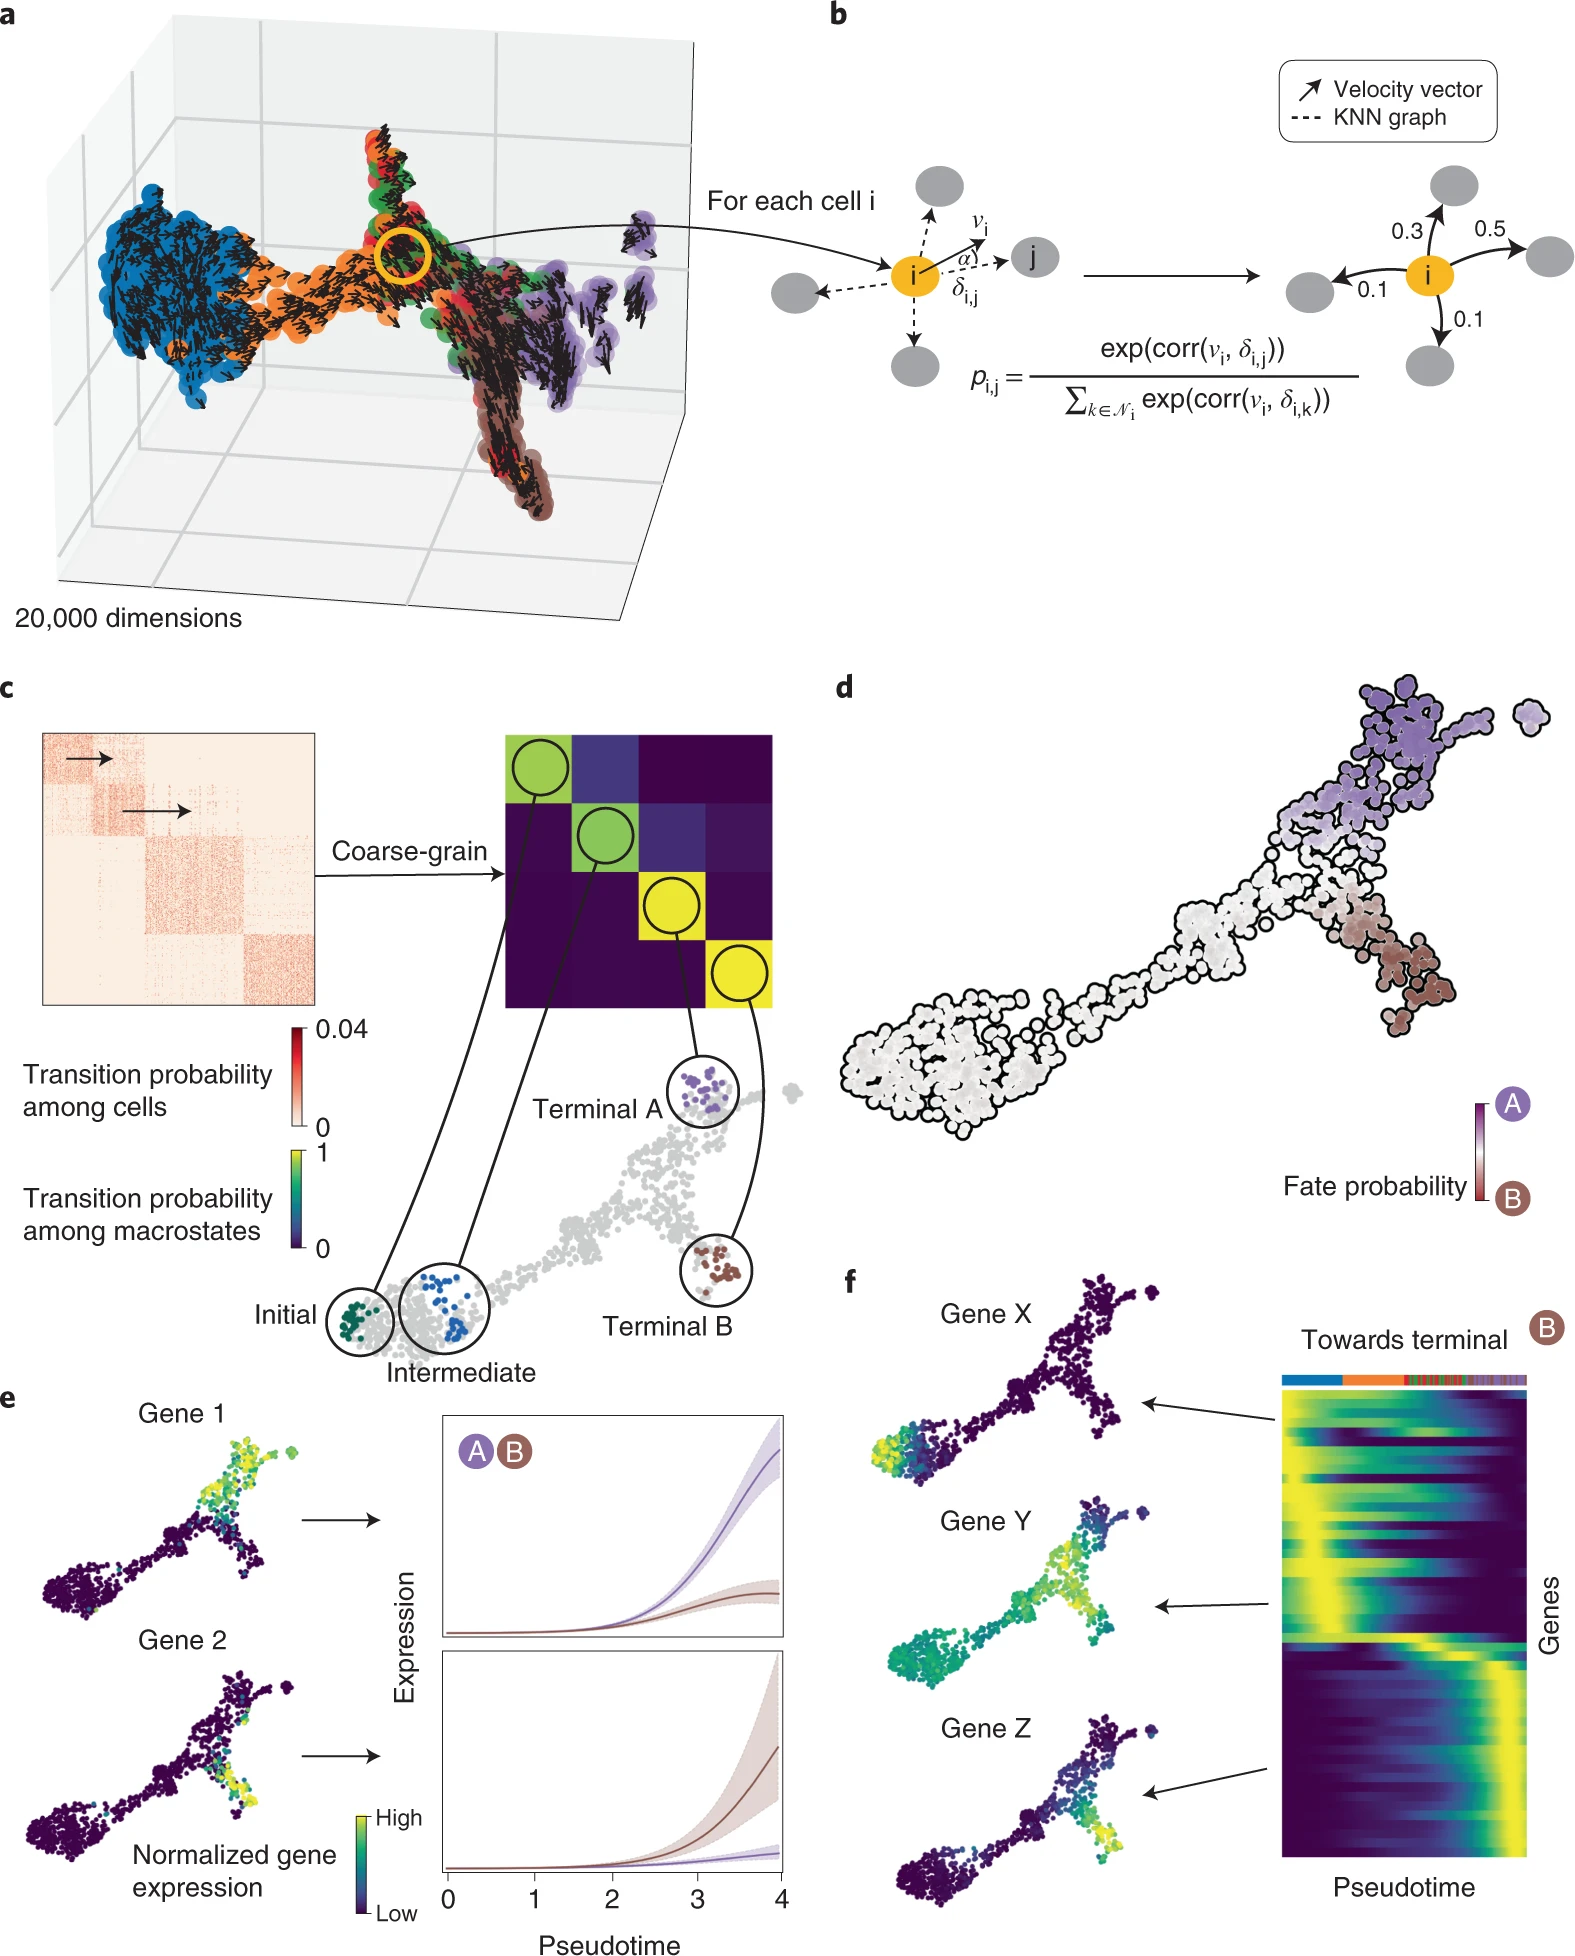

## With Pre-Computed Cell-Cell Transition Matrix

We create a velocity kernel based on the given transition matrix.

In [31]:
pre_k = cr.kernels.PrecomputedKernel(adata_pan_dyn.uns['transition_matrix'].copy(), adata=adata_pan_dyn, obsp_key=None)

In [32]:
pre_g = cr.estimators.GPCCA(pre_k)
print(pre_g)

GPCCA[kernel=PrecomputedKernel[n=3696], initial_states=None, terminal_states=None]


We calculate macrostates based on the transition matrix, using a suggested number of clusters and a cluster key for input to fit the estimator.

In [33]:
pre_g.fit(cluster_key="clusters", n_states=8)

Computing Schur decomposition
Adding `adata.uns['eigendecomposition_fwd']`
       `.schur_vectors`
       `.schur_matrix`
       `.eigendecomposition`
    Finish (0:00:00)
Computing `8` macrostates
Adding `.macrostates`
       `.macrostates_memberships`
       `.coarse_T`
       `.coarse_initial_distribution
       `.coarse_stationary_distribution`
       `.schur_vectors`
       `.schur_matrix`
       `.eigendecomposition`
    Finish (0:00:01)


GPCCA[kernel=PrecomputedKernel[n=3696], initial_states=None, terminal_states=None]

/home/sarah.ancheta/miniconda3/envs/vel38zebra/lib/python3.8/site-packages/scvelo/plotting/scatter.py:614: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(


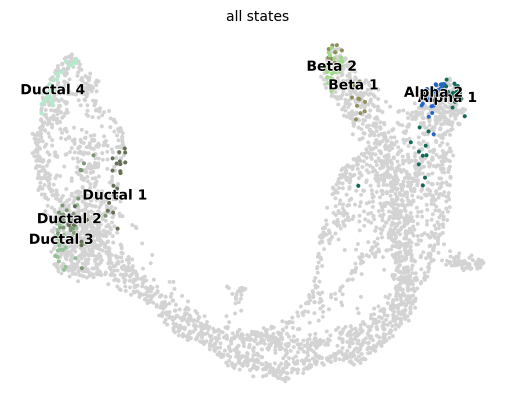

In [34]:
pre_g.plot_macrostates(which='all')

We set the terminal macrostates.

Adding `adata.obs['term_states_fwd']`
       `adata.obs['term_states_fwd_probs']`
       `.terminal_states`
       `.terminal_states_probabilities`
       `.terminal_states_memberships
    Finish`


/home/sarah.ancheta/miniconda3/envs/vel38zebra/lib/python3.8/site-packages/scvelo/plotting/scatter.py:614: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(


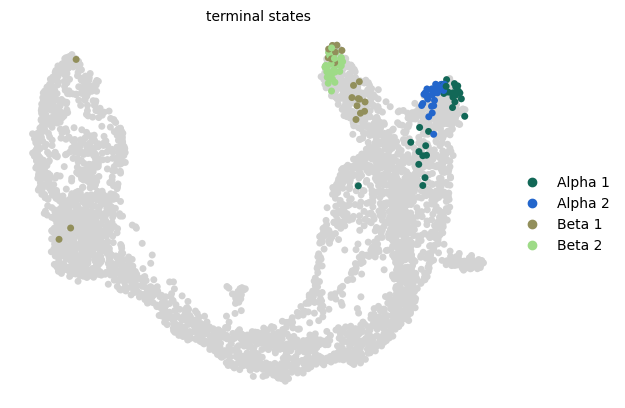

In [37]:
pre_g.set_terminal_states(states=["Alpha_1", "Alpha_2", "Beta_1", "Beta_2"])
pre_g.plot_macrostates(which="terminal", legend_loc="right", size=100)

We compute the fate probability of each cell belonging to a particular termianl state. 

Computing fate probabilities


  0%|          | 0/4 [00:00<?, ?/s]

Adding `adata.obsm['lineages_fwd']`
       `.fate_probabilities`
    Finish (0:00:00)


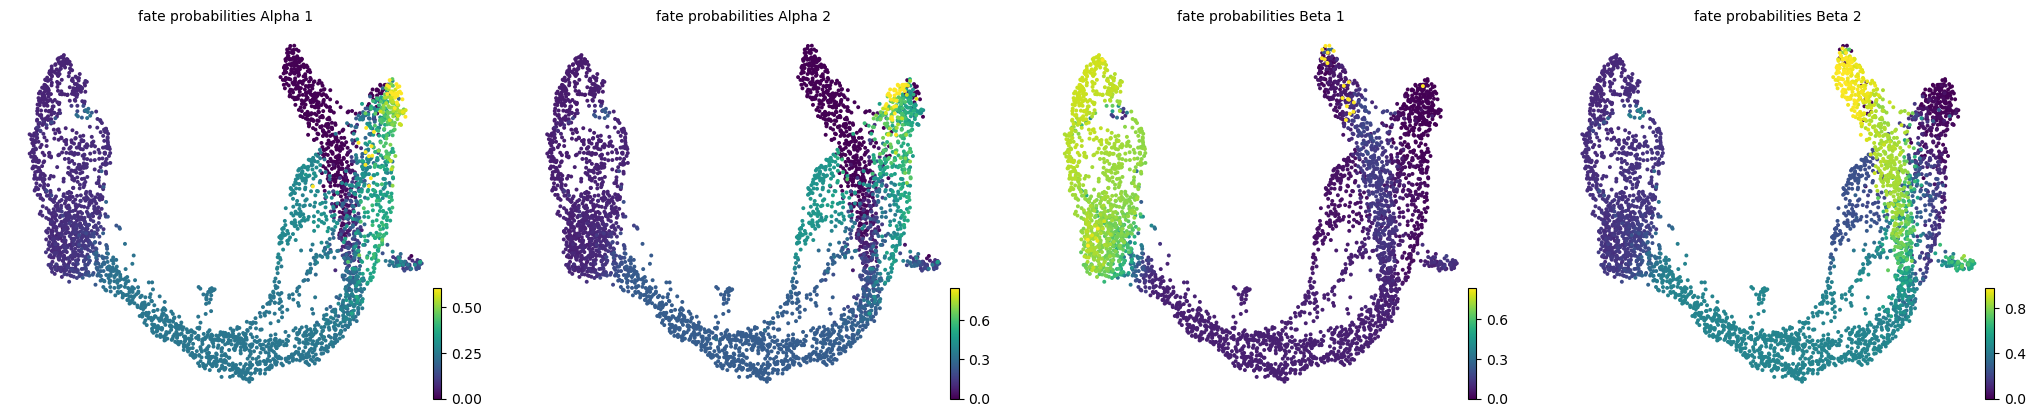

In [38]:
pre_g.compute_fate_probabilities()
pre_g.plot_fate_probabilities(same_plot=False)

/home/sarah.ancheta/miniconda3/envs/vel38zebra/lib/python3.8/site-packages/scvelo/plotting/scatter.py:614: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(
/home/sarah.ancheta/miniconda3/envs/vel38zebra/lib/python3.8/site-packages/scvelo/plotting/scatter.py:614: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(


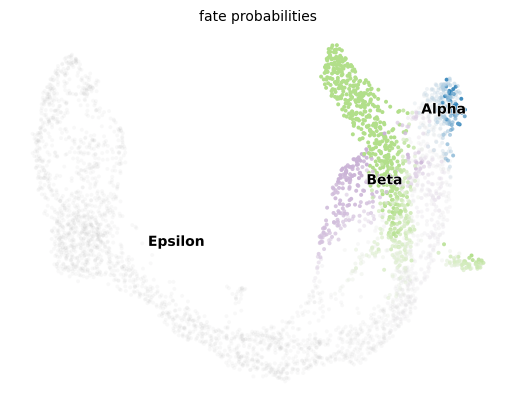

In [39]:
g.plot_fate_probabilities(same_plot=True)

We compute the lineage drivers for each end state, based on their correlation to the fate probabilties of cells for the terminal state.

In [40]:
pre_g.compute_lineage_drivers()

Adding `adata.varm['terminal_lineage_drivers']`
       `.lineage_drivers`
    Finish (0:00:00)


Alpha_1_corr   Alpha_1_pval   Alpha_1_qval  Alpha_1_ci_low  \
index                                                                       
Arx                0.427663  8.952809e-170  1.741321e-166        0.400951   
Aplp1              0.410527  7.308585e-155  7.107599e-152        0.383360   
Gcg                0.395929  6.842544e-143  4.436249e-140        0.368391   
Irx2               0.391621  1.756578e-139  8.541360e-137        0.363975   
Etv1               0.370213  2.429058e-123  9.449035e-121        0.342055   
...                     ...            ...            ...             ...   
Ins2              -0.345012  5.814071e-106  7.538912e-104       -0.373102   
Mif               -0.347143  2.288557e-107  3.179460e-105       -0.375185   
Bicc1             -0.351453  3.040113e-110  4.927517e-108       -0.379395   
1700011H14Rik     -0.352162  1.011527e-110  1.788563e-108       -0.380088   
Atp1b1            -0.366772  7.233429e-121  2.009860e-118       -0.394350   

               Alpha_1_ci_high  Alpha_2_corr   Alpha_2_pval   Alpha_2_qval  \
index                                                                        
Arx                   0.453649      0.480770  1.665018e-222  1.079487e-219   
Aplp1                 0.436984      0.433726  2.784721e-175  9.027138e-173   
Gcg                   0.422773      0.555359   0.000000e+00   0.000000e+00   
Irx2                  0.418577      0.536131  7.734742e-290  7.522036e-287   
Etv1                  0.397707      0.470522  1.669587e-211  8.118365e-209   
...                        ...           ...            ...            ...   
Ins2                 -0.316289     -0.321613   2.701326e-91   1.313520e-89   
Mif                  -0.318467     -0.334668   2.612221e-99   1.638958e-97   
Bicc1                -0.322871     -0.352564  5.417067e-111  5.017235e-109   
1700011H14Rik        -0.323595     -0.353785  8.055732e-112  8.246526e-110   
Atp1b1               -0.338534     -0.319436   5.342822e-90   2.361770e-88   

               Alpha_2_ci_low  Alpha_2_ci_high  Beta_1_corr    Beta_1_pval  \
index                                                                        
Arx                  0.455591         0.505181    -0.343234  8.457297e-105   
Aplp1                0.407179         0.459540    -0.782187   0.000000e+00   
Gcg                  0.532656         0.577264    -0.244481   6.103570e-52   
Irx2                 0.512753         0.558714    -0.288555   8.170423e-73   
Etv1                 0.445032         0.495250    -0.332981   2.996098e-98   
...                       ...              ...          ...            ...   
Ins2                -0.350223        -0.292404    -0.148129   1.206427e-19   
Mif                 -0.362992        -0.305726     0.590618   0.000000e+00   
Bicc1               -0.380480        -0.324006     0.784242   0.000000e+00   
1700011H14Rik       -0.381673        -0.325254     0.781630   0.000000e+00   
Atp1b1              -0.348092        -0.290183     0.642361   0.000000e+00   

                 Beta_1_qval  Beta_1_ci_low  Beta_1_ci_high  Beta_2_corr  \
index                                                                      
Arx            5.538533e-104      -0.371365       -0.314473    -0.175949   
Aplp1           0.000000e+00      -0.794395       -0.769348     0.349455   
Gcg             2.235677e-51      -0.274557       -0.213926    -0.318523   
Irx2            3.875969e-72      -0.317839       -0.258721    -0.254549   
Etv1            1.861792e-97      -0.361342       -0.304003    -0.149595   
...                      ...            ...             ...          ...   
Ins2            2.697127e-19      -0.179513       -0.116444     0.566001   
Mif             0.000000e+00       0.569216        0.611220    -0.239139   
Bicc1           0.000000e+00       0.771508        0.796347    -0.438342   
1700011H14Rik   0.000000e+00       0.768762        0.793865    -0.434254   
Atp1b1          0.000000e+00       0.623023        0.660915    -0.29606

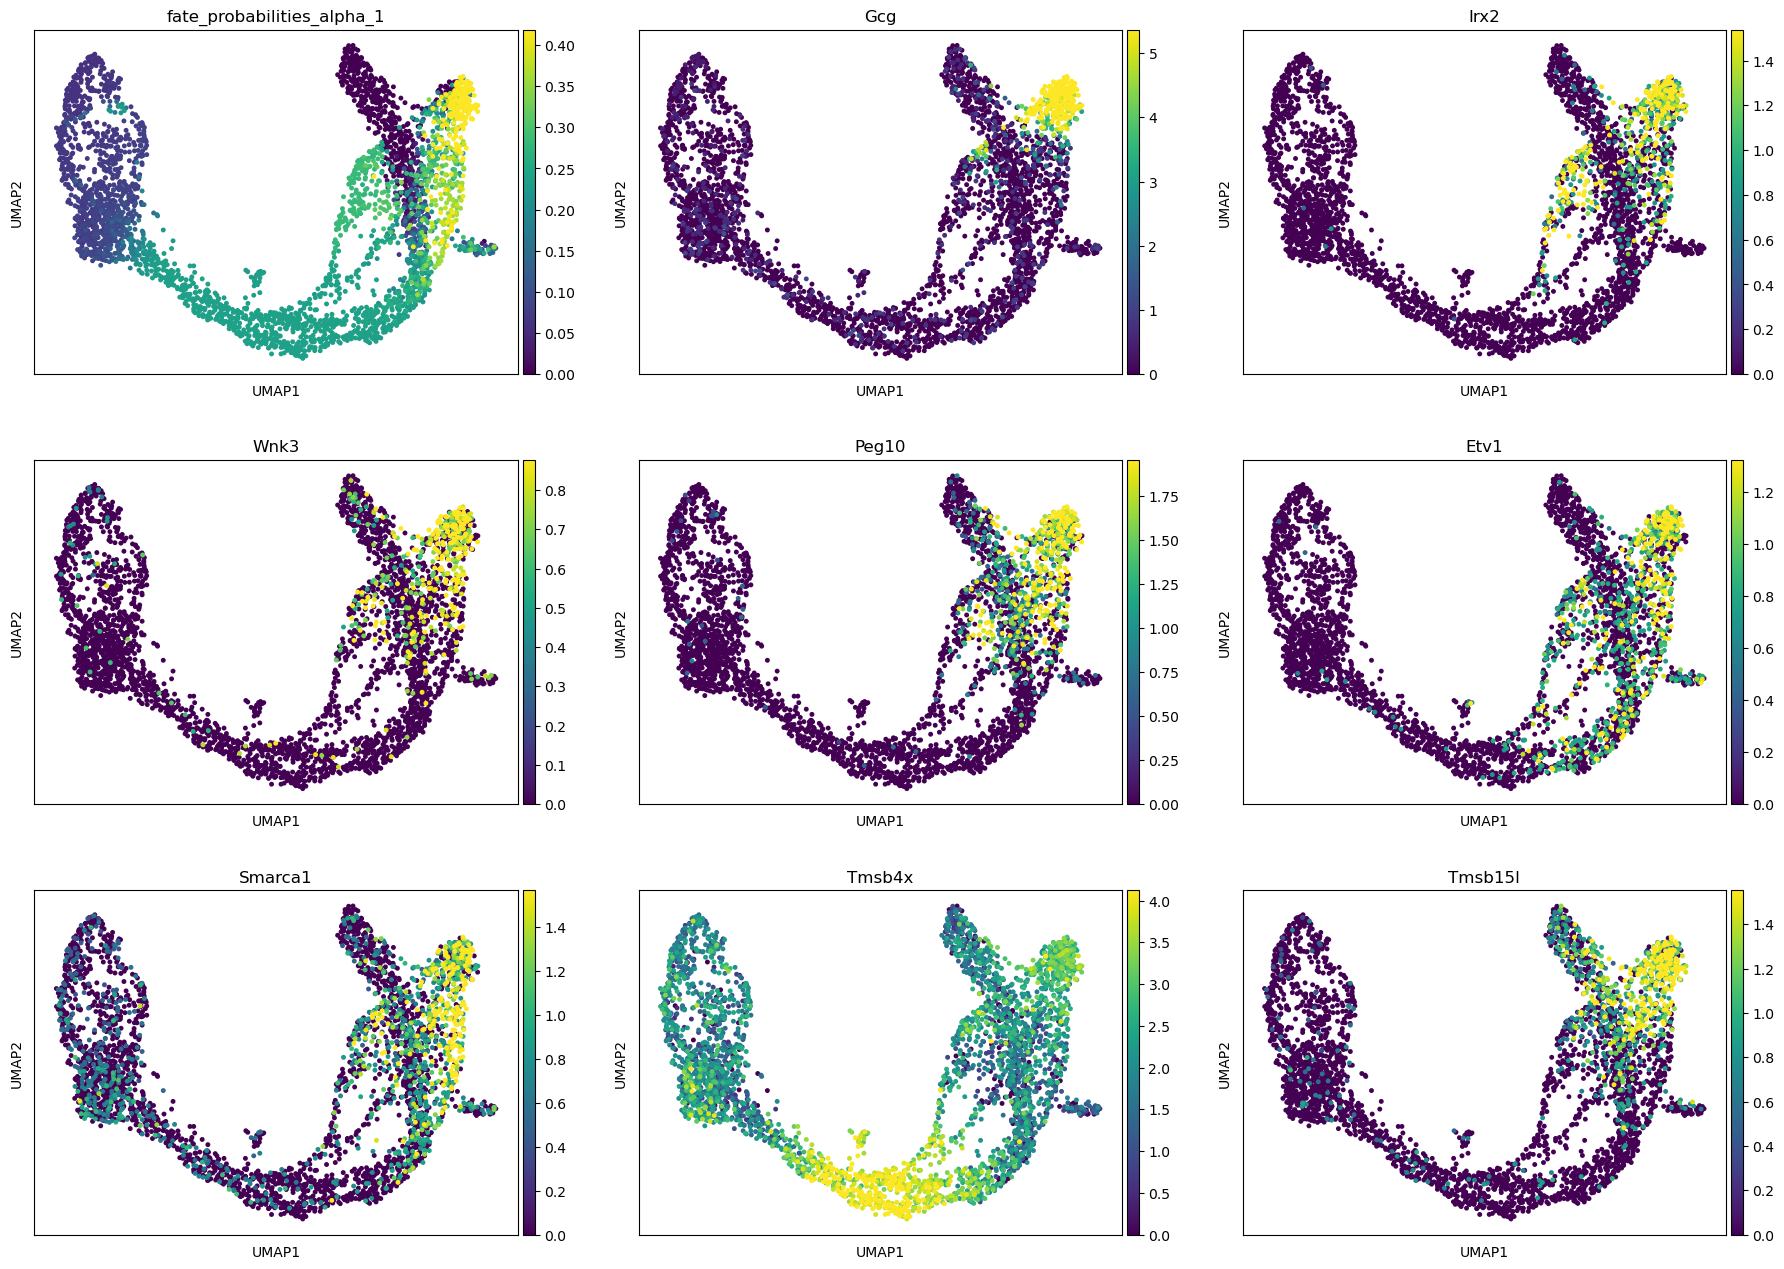

In [42]:
adata_pan_dyn.obs["fate_probabilities_alpha_1"] = pre_g.fate_probabilities["Alpha_1"].X.flatten()

sc.pl.embedding(
    adata_pan_dyn,
    basis="umap",
    color=["fate_probabilities_alpha_1"] + list(alpha_df.index[:8]),
    color_map="viridis",
    s=50,
    ncols=3,
    vmax="p96",
)

## Compute Driver Genes with Velocity Kernel, CellRank Transition Matrix

In [7]:
kernel = crpk.VelocityKernel(adata_pan_dyn, backward=False, attr='layers', vkey='velocity')

In [8]:
kernel.compute_transition_matrix()

Computing transition matrix using `'deterministic'` model


  0%|          | 0/3696 [00:00<?, ?cell/s]

Using `softmax_scale=5.7239`


  0%|          | 0/3696 [00:00<?, ?cell/s]

    Finish (0:00:04)


VelocityKernel[n=3696, model='deterministic', similarity='correlation', softmax_scale=5.724]

In [9]:
g = cr.estimators.GPCCA(kernel)
print(g)

GPCCA[kernel=VelocityKernel[n=3696], initial_states=None, terminal_states=None]


In [10]:
g.fit(cluster_key="clusters", n_states=8)

Computing Schur decomposition
When computing macrostates, choose a number of states NOT in `[7]`
Adding `adata.uns['eigendecomposition_fwd']`
       `.schur_vectors`
       `.schur_matrix`
       `.eigendecomposition`
    Finish (0:00:00)
Computing `8` macrostates
Adding `.macrostates`
       `.macrostates_memberships`
       `.coarse_T`
       `.coarse_initial_distribution
       `.coarse_stationary_distribution`
       `.schur_vectors`
       `.schur_matrix`
       `.eigendecomposition`
    Finish (0:00:02)


GPCCA[kernel=VelocityKernel[n=3696], initial_states=None, terminal_states=None]

/home/sarah.ancheta/miniconda3/envs/vel38zebra/lib/python3.8/site-packages/scvelo/plotting/scatter.py:614: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(


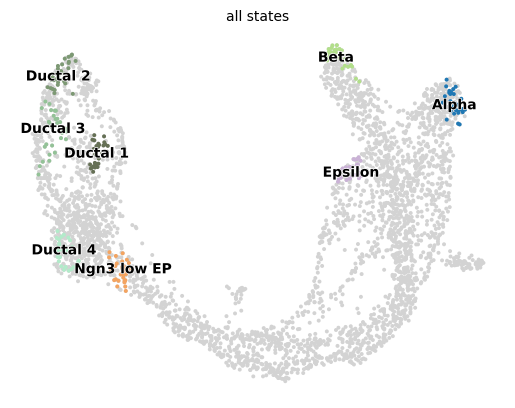

In [11]:
g.plot_macrostates(which='all')

Adding `adata.obs['term_states_fwd']`
       `adata.obs['term_states_fwd_probs']`
       `.terminal_states`
       `.terminal_states_probabilities`
       `.terminal_states_memberships
    Finish`


/home/sarah.ancheta/miniconda3/envs/vel38zebra/lib/python3.8/site-packages/scvelo/plotting/scatter.py:614: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(


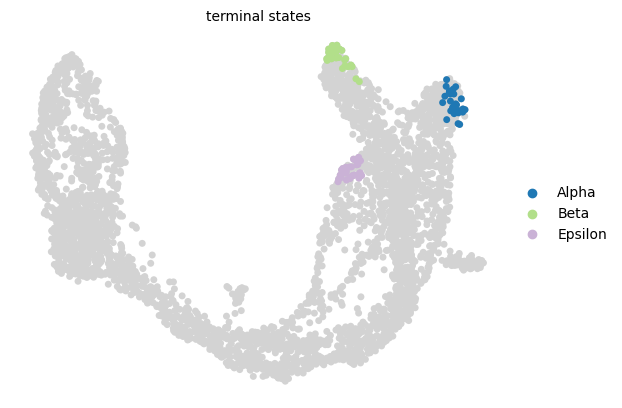

In [12]:
g.set_terminal_states(states=["Alpha", "Beta", "Epsilon"])
g.plot_macrostates(which="terminal", legend_loc="right", size=100)

Computing fate probabilities


  0%|          | 0/3 [00:00<?, ?/s]

Adding `adata.obsm['lineages_fwd']`
       `.fate_probabilities`
    Finish (0:00:00)


[0]PETSC ERROR: ------------------------------------------------------------------------


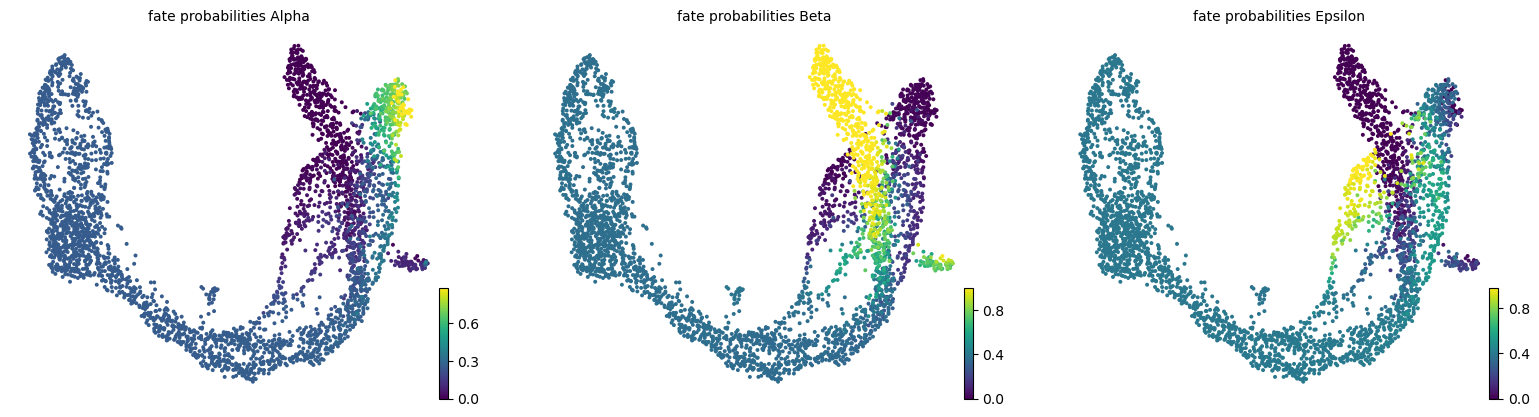

In [13]:
g.compute_fate_probabilities()
g.plot_fate_probabilities(same_plot=False)

/home/sarah.ancheta/miniconda3/envs/vel38zebra/lib/python3.8/site-packages/scvelo/plotting/scatter.py:614: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(
/home/sarah.ancheta/miniconda3/envs/vel38zebra/lib/python3.8/site-packages/scvelo/plotting/scatter.py:614: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(


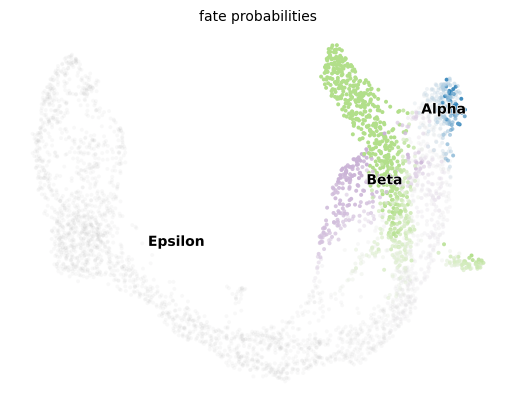

In [14]:
g.plot_fate_probabilities(same_plot=True)

In [18]:
alpha_df = g.compute_lineage_drivers(
    lineages=["Alpha"])

Adding `adata.varm['terminal_lineage_drivers']`
       `.lineage_drivers`
    Finish (0:00:00)


In [21]:
g.compute_lineage_drivers()

Adding `adata.varm['terminal_lineage_drivers']`
       `.lineage_drivers`
    Finish (0:00:00)


Alpha_corr     Alpha_pval     Alpha_qval  Alpha_ci_low  Alpha_ci_high  \
index                                                                          
Gcg      0.642828   0.000000e+00   0.000000e+00      0.623509       0.661362   
Irx2     0.317572   6.728855e-89   1.189784e-86      0.288283       0.346268   
Wnk3     0.309012   5.969760e-84   9.675986e-82      0.279557       0.337887   
Peg10    0.303107   1.228075e-80   1.706147e-78      0.273539       0.332103   
Etv1     0.286293   1.217747e-71   1.530679e-69      0.256419       0.315621   
...           ...            ...            ...           ...            ...   
Sytl4   -0.378369  2.456978e-129  7.964704e-127     -0.405662      -0.350403   
Pdx1    -0.405047  2.723232e-150  1.059337e-147     -0.431651      -0.377739   
Ins2    -0.407747  1.565012e-152  7.609873e-150     -0.434279      -0.380508   
Nnat    -0.434161  1.108542e-175  7.187045e-173     -0.459963      -0.407626   
Gng12   -0.439872  5.405228e-181  5.256584e-178     -0.465511      -0.413496   

       Beta_corr      Beta_pval      Beta_qval  Beta_ci_low  Beta_ci_high  \
index                                                                       
Gcg    -0.390358  1.711137e-138  1.751664e-136    -0.417347     -0.362682   
Irx2   -0.384202  9.705038e-134  9.438149e-132    -0.411348     -0.356376   
Wnk3   -0.207291   2.058998e-37   3.512939e-36    -0.237941     -0.176228   
Peg10  -0.172207   4.089497e-26   4.651504e-25    -0.203319     -0.140747   
Etv1   -0.279482   3.547929e-68   1.131266e-66    -0.308939     -0.249489   
...          ...            ...            ...          ...           ...   
Sytl4   0.562550   0.000000e+00   0.000000e+00     0.540105      0.584195   
Pdx1    0.621162   0.000000e+00   0.000000e+00     0.600957      0.640575   
Ins2    0.622537   0.000000e+00   0.000000e+00     0.602387      0.641895   
Nnat    0.680985   0.000000e+00   0.000000e+00     0.663307      0.697903   
Gng12   0.671418   0.000000e+00   0.000000e+00     0.653319      0.688749   

       Epsilon_corr   Epsilon_pval   Epsilon_qval  Epsilon_ci_low  \
index                                                               
Gcg        0.011393   4.886872e-01   5.601041e-01       -0.020855   
Irx2       0.271427   3.281724e-64   1.302644e-62        0.241297   
Wnk3       0.032760   4.641908e-02   7.137163e-02        0.000520   
Peg10     -0.011095   5.001273e-01   5.718680e-01       -0.043321   
Etv1       0.151796   1.451119e-20   1.477710e-19        0.120143   
...             ...            ...            ...             ...   
Sytl4     -0.468952  7.430479e-210  1.605809e-207       -0.493728   
Pdx1      -0.528337  1.748782e-279  6.802762e-277       -0.551189   
Ins2      -0.528018  4.582698e-279  1.485558e-276       -0.550880   
Nnat      -0.587391   0.000000e+00   0.000000e+00       -0.608116   
Gng12     -0.569386   0.000000e+00   0.000000e+00       -0.590781   

       Epsilon_ci_high  
index                   
Gcg           0.043618  
Irx2          0.301033  
Wnk3          0.064933  
Peg10         0.021153  
Etv1          0.183141  
...                ...  
Sytl4        -0.443416  
Pdx1         -0.504693  
Ins2         -0.504363  
Nnat         -0.565867  
Gng12        -0.547190  

[1945 rows x 15 columns]

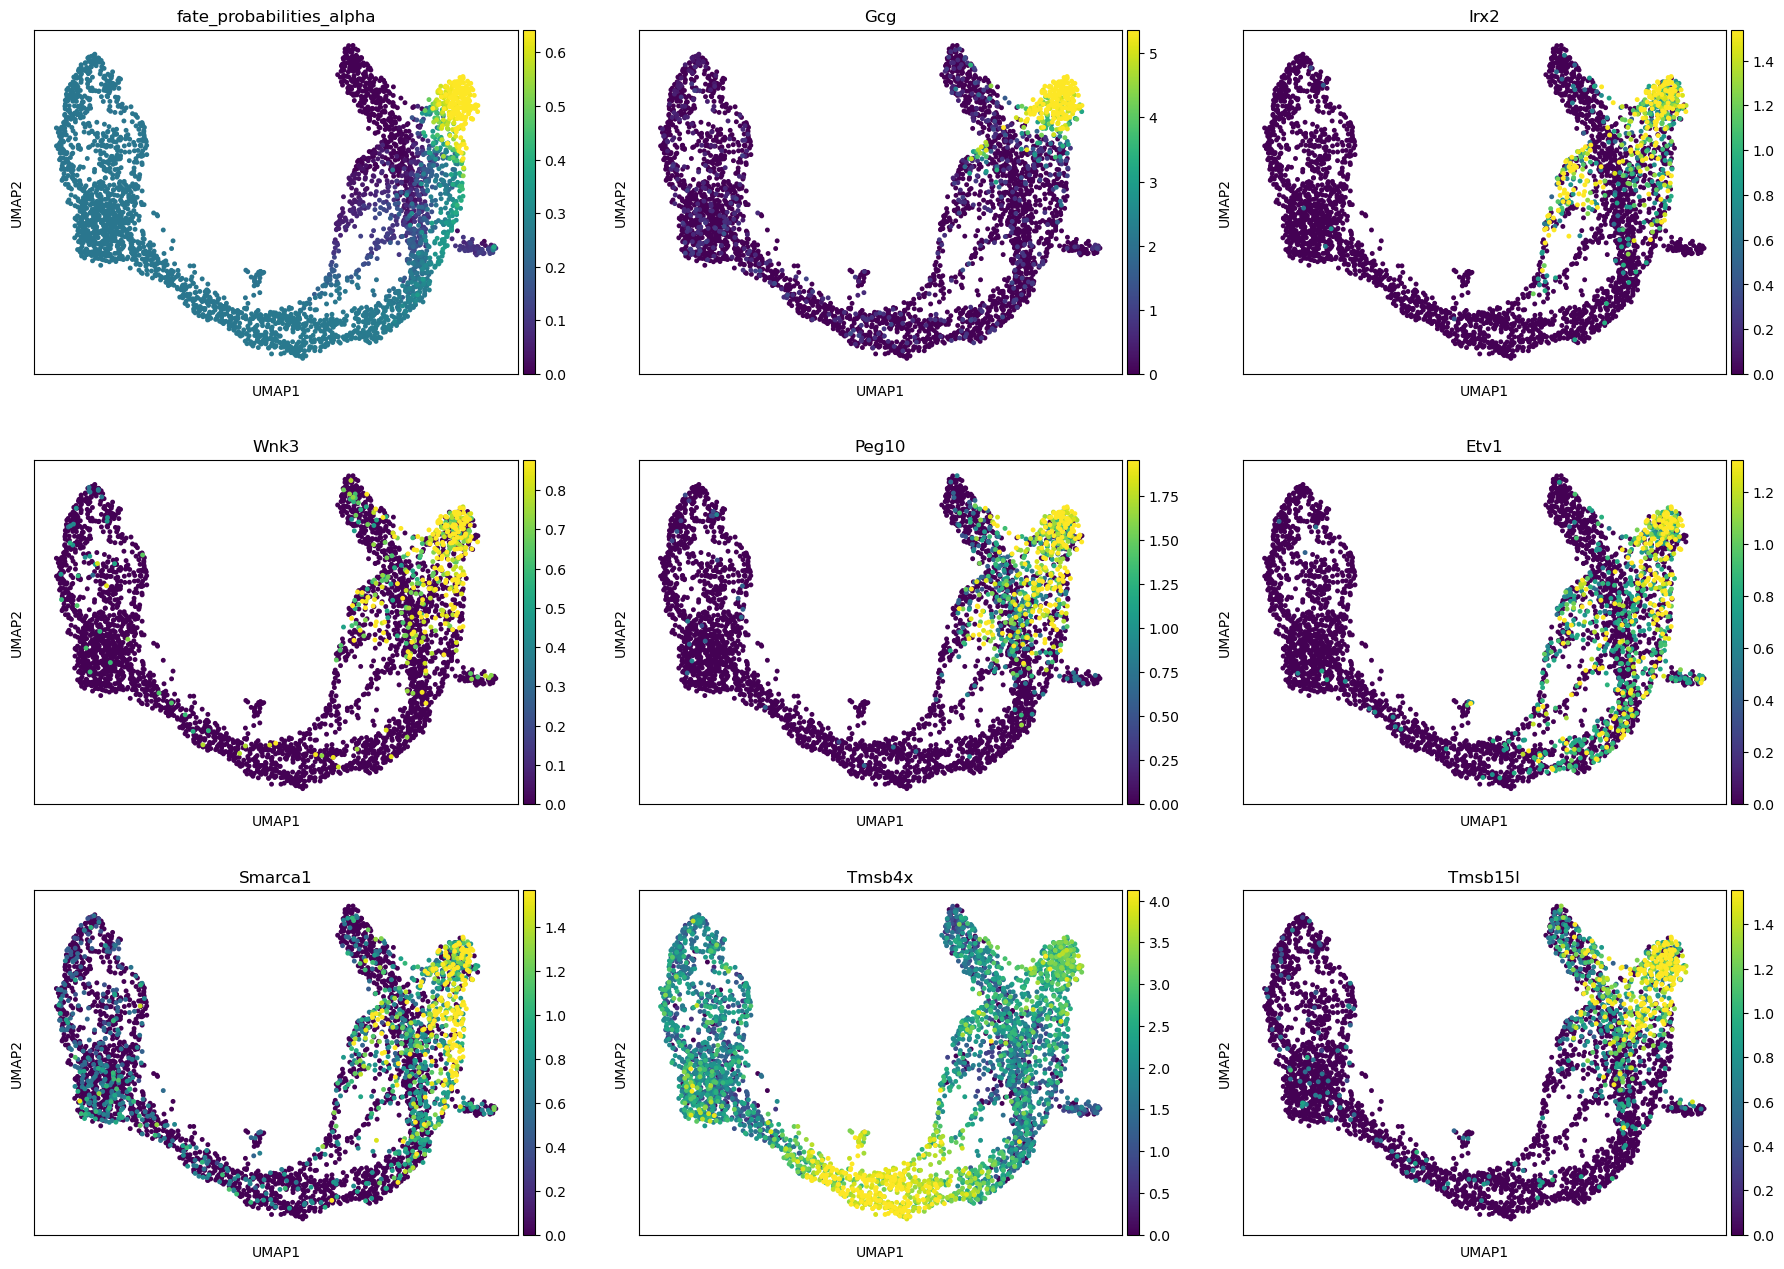

In [19]:
adata_pan_dyn.obs["fate_probabilities_alpha"] = g.fate_probabilities["Alpha"].X.flatten()

sc.pl.embedding(
    adata_pan_dyn,
    basis="umap",
    color=["fate_probabilities_alpha"] + list(alpha_df.index[:8]),
    color_map="viridis",
    s=50,
    ncols=3,
    vmax="p96",
)